# Pacotes
---

In [40]:
install.packages("gridExtra")

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmp63pDQK\downloaded_packages


In [42]:
library(dplyr)
library(ggplot2)
library(AER)
library(gvlma)
library(lmtest)
library(nortest)
library(ggpubr)
library(plyr)
library(cowplot)
library(gridExtra)

In [3]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [4]:
df = data[data$CO_GRUPO == 13,]

In [5]:
dim(df)

[1] 9582  137

## Criando uma variável Dummy para UFPR IES 571
* Número de verificações = 114

In [6]:
df$ufpr = as.factor(ifelse(df$CO_IES == 571,1,0))

In [7]:
table(df$ufpr)


   0    1 
9468  114 

In [8]:
df_1 = df %>% 
        select(NT_GER, ufpr, TP_SEXO, NU_IDADE,QE_I02, QE_I08, QE_I21, QE_I10,QE_I23) %>% 
        setNames(c("nota", "ufpr", "genero", "idade","cor", "renda", "escolaridade_pais","trabalho", "esforco"))

In [9]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
161,24.9,0,F,28,A,C,B,E,C
162,25.6,0,M,30,A,D,A,E,B
163,48.7,0,M,29,A,C,B,E,C
164,35.7,0,F,22,A,B,A,E,B
165,33.9,0,M,47,A,B,A,E,C
166,23.5,0,M,27,A,C,B,E,C


# Nomeando as categorias
---

In [10]:
df_1$cor = mapvalues(df_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))
df_1$renda = mapvalues(df_1$renda, from=c("A","B","C","D","E","F","G"), to=c("Até 1.5 salário mínimo","De 1.5 a 3 salários mínimos",
                                                                "De 3 a 4.5 salários mínimos","De 4.5 a 6 salários mínimos","De 6 a 10 salários mínimos",
                                                                                "10 a 30 salários mínimos", "Acima de 30 salários mínimos"))
df_1$escolaridade_pais = mapvalues(df_1$escolaridade_pais, from=c("A","B"), to=c("sim","não"))
df_1$trabalho = mapvalues(df_1$trabalho, from=c("A","B","C","D","E"), to=c("Não trabalha",
                                                                  "Trabalha eventualmente",
                                                                 "Trabalha até 20 hrs. semanais",
                                                                 "Trabalha de 21 a 39 hrs. semanais",
                                                                 "Trabalha 40 hrs. semanais ou mais"))
df_1$esforco = mapvalues(df_1$esforco, from=c("A","B","C","D","E"), to=c("Nenhuma, apenas assistindo as aulas","De uma a três",
                                                                "De quatro a sete","De oito adoze","Mais de doze"))

In [11]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
161,24.9,0,F,28,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
162,25.6,0,M,30,branca,De 4.5 a 6 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
163,48.7,0,M,29,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
164,35.7,0,F,22,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
165,33.9,0,M,47,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De quatro a sete
166,23.5,0,M,27,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete


In [46]:
df_ufpr = df_1[df_1$ufpr==1,]

# Distribuição das notas
---

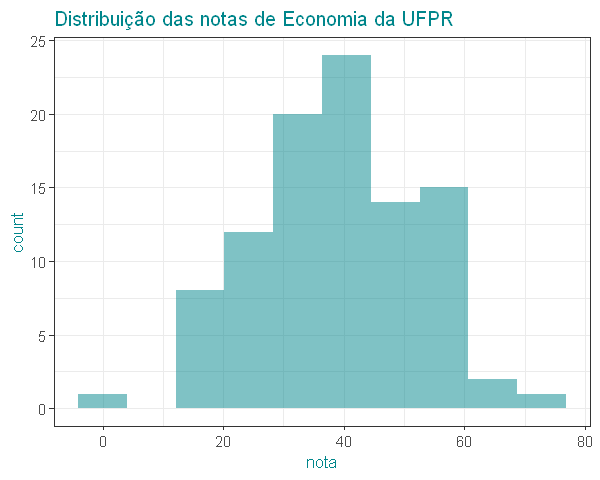

In [65]:
ggplot(df_ufpr, aes(x=nota)) +
    geom_histogram(alpha=0.5, bins = 10, fill="turquoise4", na.rm = TRUE)+
    ggtitle("Distribuição das notas de Economia da UFPR")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))

## A média das notas da Ufpr são levemente maiores

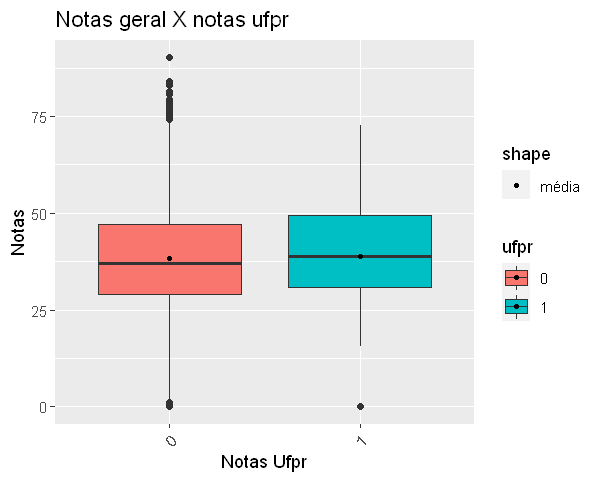

In [73]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_1, aes(x=ufpr, y=nota, fill=ufpr)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
    ggtitle("Notas geral X notas ufpr")+
    xlab("Notas Ufpr")+
    ylab("Notas")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Notas por Cor/Raça
---

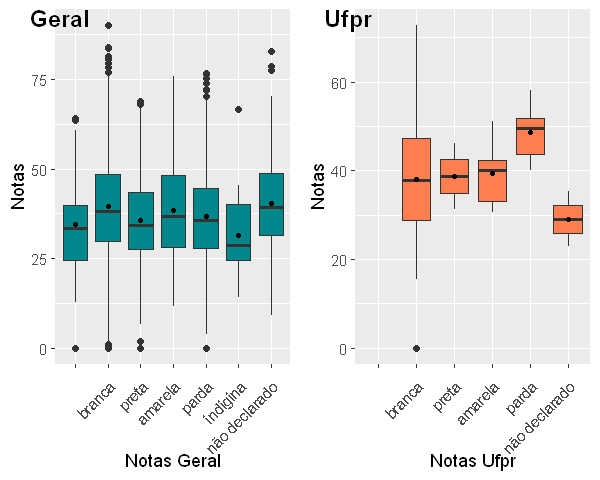

In [75]:
b1 = ggplot(df_1, aes(x=cor, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=cor, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Notas por Gênero
---

In [84]:
print('Geral')
prop.table(table(df_1$genero))
print('Ufpr')
prop.table(table(df_ufpr$genero))

[1] "Geral"



        F         M 
0.3956377 0.6043623 

[1] "Ufpr"



        F         M 
0.3333333 0.6666667 

In [87]:
print('Geral')
tapply(df_1$nota, df_1$esforco, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$esforco, FUN=mean, na.rm=T)

[1] "Geral"


Nenhuma, apenas assistindo as aulas 
                           34.51633                            36.80503 
                      De uma a três                    De quatro a sete 
                           36.63784                            38.65646 
                      De oito adoze                        Mais de doze 
                           41.17359                            42.91801

[1] "Ufpr"


Nenhuma, apenas assistindo as aulas 
                                NaN                            33.63636 
                      De uma a três                    De quatro a sete 
                           39.78378                            43.23333 
                      De oito adoze                        Mais de doze 
                           42.61250                            46.07143

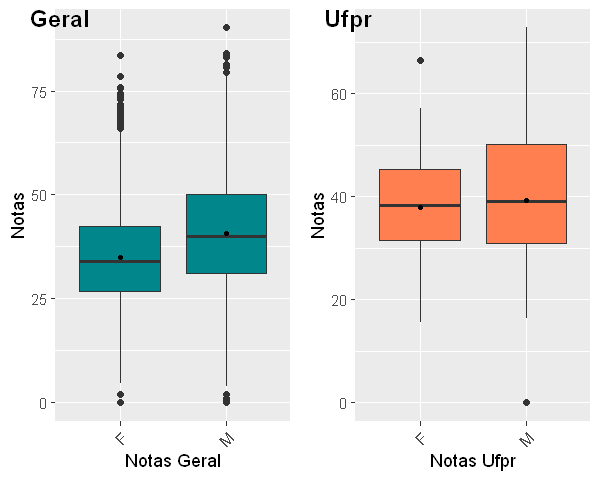

In [72]:
b1 = ggplot(df_1, aes(x=genero, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=genero, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Notas por Renda
---

In [88]:
print('Geral')
prop.table(table(df_1$renda))
print('Ufpr')
prop.table(table(df_ufpr$renda))

[1] "Geral"



                                   Até 1.5 salário mínimo 
                  0.11344187                   0.13420998 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                  0.16301398                   0.15737842 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                  0.10363181                   0.13963682 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                  0.13661031                   0.05207681 

[1] "Ufpr"



                                   Até 1.5 salário mínimo 
                  0.05263158                   0.34210526 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                  0.08771930                   0.09649123 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                  0.09649123                   0.16666667 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                  0.13157895                   0.02631579 

In [89]:
print('Geral')
tapply(df_1$nota, df_1$renda, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$renda, FUN=mean, na.rm=T)

[1] "Geral"


Até 1.5 salário mínimo 
                    34.51633                     34.41064 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                    35.29743                     36.29457 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                    38.04718                     40.28169 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                    44.10796                     45.88846

[1] "Ufpr"


Até 1.5 salário mínimo 
                         NaN                     35.63437 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                    37.84444                     43.39091 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                    38.78182                     39.48889 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                    42.59286                     36.15000

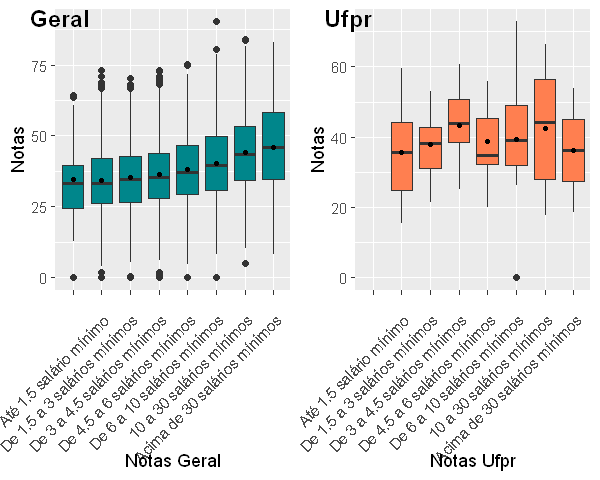

In [77]:
b1 = ggplot(df_1, aes(x=renda, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=renda, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Notas por escolaridade dos pais
---

In [93]:
print('Geral')
prop.table(table(df_1$escolaridade_pais))
print('Ufpr')
prop.table(table(df_ufpr$escolaridade_pais))

[1] "Geral"



                sim       não 
0.1134419 0.6793989 0.2071593 

[1] "Ufpr"



                  sim        não 
0.05263158 0.82456140 0.12280702 

In [94]:
print('Geral')
tapply(df_1$nota, df_1$escolaridade_pais, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$escolaridade_pais, FUN=mean, na.rm=T)

[1] "Geral"


sim      não 
34.51633 39.35790 35.40174

[1] "Ufpr"


sim      não 
     NaN 39.12771 36.90000

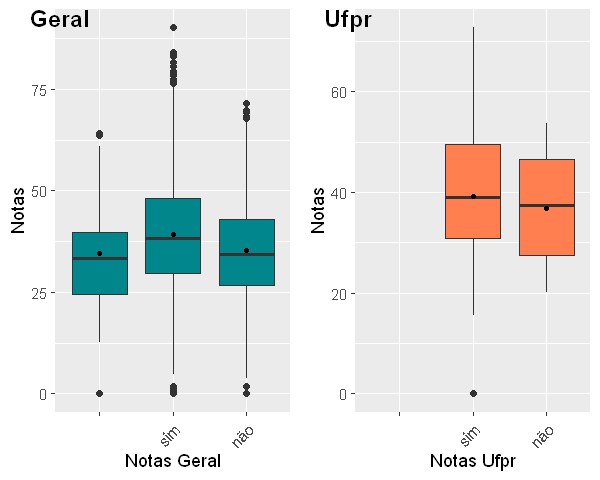

In [92]:
b1 = ggplot(df_1, aes(x=escolaridade_pais, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=escolaridade_pais, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Notas por trabalho
---

In [96]:
print('Geral')
prop.table(table(df_1$trabalho))
print('Ufpr')
prop.table(table(df_ufpr$trabalho))

[1] "Geral"



                                                       Não trabalha 
                       0.11344187                        0.35170111 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                       0.03934460                        0.03871843 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                       0.12888750                        0.32790649 

[1] "Ufpr"



                                                       Não trabalha 
                       0.05263158                        0.53508772 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                       0.04385965                        0.00000000 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                       0.10526316                        0.26315789 

In [95]:
print('Geral')
tapply(df_1$nota, df_1$trabalho, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$trabalho, FUN=mean, na.rm=T)

[1] "Geral"


Não trabalha 
                         34.51633                          40.34725 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                         38.99009                          38.58397 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                         38.46692                          36.22492

[1] "Ufpr"


Não trabalha 
                              NaN                          39.19038 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                         42.12000                                NA 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                         38.22500                          37.75000

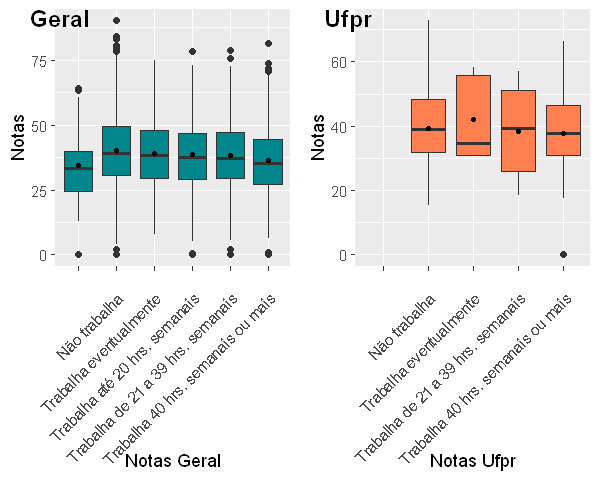

In [79]:
b1 = ggplot(df_1, aes(x=trabalho, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=trabalho, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Notas por esforço
---

In [98]:
print('Geral')
prop.table(table(df_1$esforco))
print('Ufpr')
prop.table(table(df_ufpr$esforco))

[1] "Geral"



                                    Nenhuma, apenas assistindo as aulas 
                         0.11344187                          0.08035901 
                      De uma a três                    De quatro a sete 
                         0.34554373                          0.27134210 
                      De oito adoze                        Mais de doze 
                         0.10321436                          0.08609894 

[1] "Ufpr"



                                    Nenhuma, apenas assistindo as aulas 
                         0.05263158                          0.33333333 
                      De uma a três                    De quatro a sete 
                         0.35087719                          0.12280702 
                      De oito adoze                        Mais de doze 
                         0.07017544                          0.07017544 

In [97]:
print('Geral')
tapply(df_1$nota, df_1$esforco, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$esforco, FUN=mean, na.rm=T)

[1] "Geral"


Nenhuma, apenas assistindo as aulas 
                           34.51633                            36.80503 
                      De uma a três                    De quatro a sete 
                           36.63784                            38.65646 
                      De oito adoze                        Mais de doze 
                           41.17359                            42.91801

[1] "Ufpr"


Nenhuma, apenas assistindo as aulas 
                                NaN                            33.63636 
                      De uma a três                    De quatro a sete 
                           39.78378                            43.23333 
                      De oito adoze                        Mais de doze 
                           42.61250                            46.07143

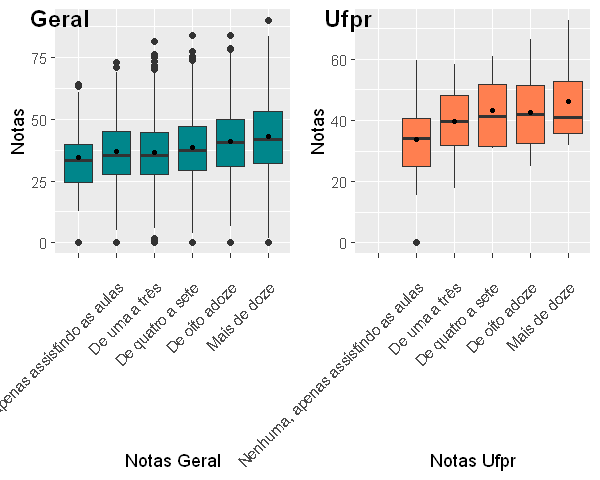

In [80]:
b1 = ggplot(df_1, aes(x=esforco, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        xlab("Notas Geral")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(df_ufpr, aes(x=esforco, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+        
        xlab("Notas Ufpr")+
        ylab("Notas")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2, labels = c("Geral", "Ufpr"))

# Teste Anova
---

In [102]:
anova_1 = aov(nota ~ genero+idade+cor+renda+escolaridade_pais+trabalho+esforco, data=df_1)
summary(anova_1)

                    Df  Sum Sq Mean Sq F value   Pr(>F)    
genero               1   67148   67148  468.71  < 2e-16 ***
idade                1   45295   45295  316.17  < 2e-16 ***
cor                  6   10000    1667   11.63 5.13e-13 ***
renda                6   66272   11045   77.10  < 2e-16 ***
escolaridade_pais    1    3311    3311   23.11 1.56e-06 ***
trabalho             4   29826    7456   52.05  < 2e-16 ***
esforco              4   18277    4569   31.89  < 2e-16 ***
Residuals         8049 1153105     143                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
1509 observations deleted due to missingness

In [103]:
anova_1 = aov(nota ~ ufpr*genero+idade+ufpr*cor+ufpr*renda+escolaridade_pais+trabalho+esforco, data=df_1)
summary(anova_1)

                    Df  Sum Sq Mean Sq F value   Pr(>F)    
ufpr                 1      16      16   0.114    0.735    
genero               1   67132   67132 468.480  < 2e-16 ***
idade                1   45295   45295 316.089  < 2e-16 ***
cor                  6   10019    1670  11.652 4.87e-13 ***
renda                6   66277   11046  77.086  < 2e-16 ***
escolaridade_pais    1    3300    3300  23.028 1.63e-06 ***
trabalho             4   29814    7453  52.014  < 2e-16 ***
esforco              4   18303    4576  31.932  < 2e-16 ***
ufpr:genero          1     135     135   0.946    0.331    
ufpr:cor             4     748     187   1.305    0.266    
ufpr:renda           6     517      86   0.601    0.730    
Residuals         8037 1151677     143                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
1509 observations deleted due to missingness

# Modelo
---

In [105]:
mod_1 = lm(nota~genero+idade+cor+renda+escolaridade_pais+trabalho+esforco, data=df_1)
summary(mod_1)


Call:
lm(formula = nota ~ genero + idade + cor + renda + escolaridade_pais + 
    trabalho + esforco, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.281  -8.270  -0.472   7.829  41.316 

Coefficients: (4 not defined because of singularities)
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                40.02649    1.85705  21.554  < 2e-16
generoM                                     5.24177    0.27870  18.808  < 2e-16
idade                                      -0.30645    0.02607 -11.757  < 2e-16
corbranca                                   8.52075    1.87432   4.546 5.55e-06
corpreta                                    7.43135    1.93504   3.840 0.000124
coramarela                                  8.74344    2.06542   4.233 2.33e-05
corparda                                    8.08272    1.89237   4.271 1.97e-05
corindigina                                 1.49054    3.33712   0.447 0.655136
cornão declara

In [106]:
mod_2 = lm(nota~ufpr*genero+idade+ufpr*cor+ufpr*renda+escolaridade_pais+trabalho+esforco, data=df_1)
summary(mod_2)


Call:
lm(formula = nota ~ ufpr * genero + idade + ufpr * cor + ufpr * 
    renda + escolaridade_pais + trabalho + esforco, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.306  -8.275  -0.486   7.808  41.321 

Coefficients: (7 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                                40.002267   1.857486  21.536
ufpr1                                      -9.575842  12.492508  -0.767
generoM                                     5.262161   0.280399  18.767
idade                                      -0.305994   0.026080 -11.733
corbranca                                   8.560254   1.874955   4.566
corpreta                                    7.445720   1.936038   3.846
coramarela                                  8.718711   2.071528   4.209
corparda                                    8.082856   1.893163   4.269
corindigina                                 1.522730   3.338028  